In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def plot_mistake_iterations(mistakes, title):
    iteration = np.arange(0, max_pass, 1)
    plt.plot(iteration,mistake)
    plt.xlabel('Iteration')
    plt.ylabel('Mistakes')
    plt.title(title)
    plt.show()

# Excercise 1
### 1) Implementation of perceptron algorithm

In [3]:
def perceptron_algo(x, y, w, b, max_pass):
    mistake = np.zeros([max_pass,])
    n, d = x.shape
    for t in range(0, max_pass):
        for i in range(0, n):
            a_w_inner = y[i]*np.inner(x[i,:], w)
            if (a_w_inner <= 0):
                w += y[i]*x[i,:]
                b += y[i]
                mistake[t] += 1
    return w, b, mistake

In [4]:
x = np.genfromtxt('spambase_X.csv', delimiter=',')
y = np.genfromtxt('spambase_Y.csv', delimiter=',')
n, d = x.shape

w = np.zeros([d,])
b = 0
max_pass = 500
w, b, mistake = perceptron_algo(x, y, w, b, max_pass)

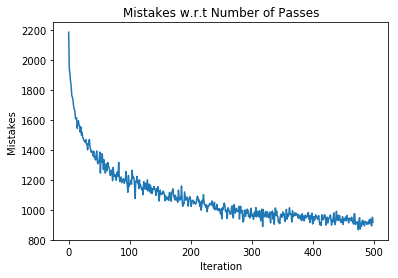

In [5]:
plot_mistake_iterations(mistake, 'Mistakes w.r.t Number of Passes')

### 2) Always updating weights in perceptron algorithm

In [6]:
def perceptron_algo_b(x, y, w, b, max_pass):
    mistake = np.zeros([max_pass,])
    n, d = x.shape
    for t in range(0, max_pass):
        for i in range(0, n):
            a_w_inner = y[i]*np.inner(x[i,:], w)
            w += y[i]*x[i,:]
            b += y[i]
            if (a_w_inner <= 0):
                mistake[t] += 1
    return w, b, mistake

In [7]:
x = np.genfromtxt('spambase_X.csv', delimiter=',')
y = np.genfromtxt('spambase_Y.csv', delimiter=',')
n, d = x.shape

w = np.zeros([d,])
b = 0
max_pass = 500
w, b, mistake = perceptron_algo_b(x, y, w, b, max_pass)

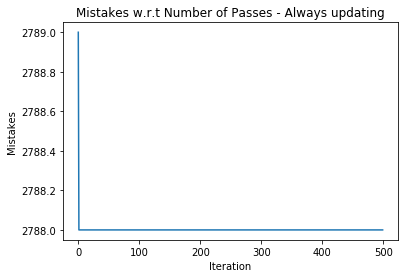

In [8]:
plot_mistake_iterations(mistake, 'Mistakes w.r.t Number of Passes - Always updating')

### 4) Implenting and running winnow algorithm over various step-sizes

In [9]:
def winnow_alogrithm(x, y, w, b, step_size, max_pass):
    mistake = np.zeros([max_pass,])
    n, d = x.shape
    for t in range(0, max_pass):
        for i in range(0, n):
            a_w_inner = y[i]*np.inner(x[i,:], w)
            if (a_w_inner <= 0):
                adjust = np.exp(step_size*y[i]*x[i,:])
                w = np.multiply(w, adjust)
                b = b*np.exp(step_size*y[i])
                s = b + np.sum(w)
                w = w/s
                b = b/s
                mistake[t] += 1
    return w, b, mistake

#### Winnow with step = 1/max(abs(x))

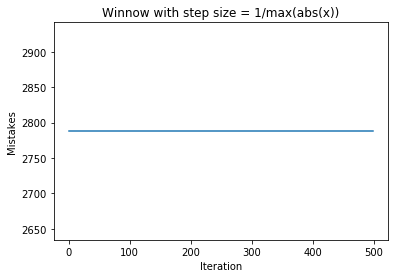

In [11]:
x = np.genfromtxt('spambase_X.csv', delimiter=',')
y = np.genfromtxt('spambase_Y.csv', delimiter=',')
n, d = x.shape

w = np.full([d,], 1/(d+1))
b = 1/(d+1)
max_pass = 500
x = x/np.amax(np.absolute(x))
step_size = 1/np.amax(np.absolute(x))
w, b, mistake = winnow_alogrithm(x, y, w, b, step_size, max_pass)
plot_mistake_iterations(mistake, "Winnow with step size = 1/max(abs(x))")

Notice that in the update we are multiplying by an exponential of some number, and therefore if we initialize the weight and bias as positive numbers then the new weight and bias will always be positive. Since our input vector x is also only positive, we generate a mistake everytime y == -1. This means changing the step won't do anything because every pass will always have a mistake when y == -1. Below the computations show that as expected the number of mistakes is equal to the number of negative y samples, and that every x sample is positive. 

In [16]:
print("count negative y_samples = {}".format(np.count_nonzero(y == -1)))
print("count negative x_samples = {}".format(np.count_nonzero(x < 0)))

count negative y_samples = 2788
count negative x_samples = 0


### 5) Transforming x with non-negtaive w\* and b\*

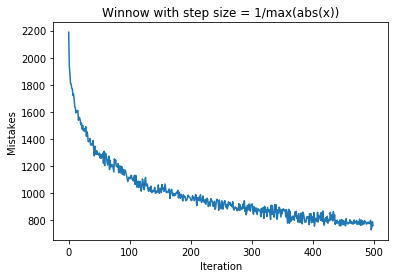

In [20]:
x = np.genfromtxt('spambase_X.csv', delimiter=',')
y = np.genfromtxt('spambase_Y.csv', delimiter=',')

# Normalize X and then add a negative version of each element
x = x/np.amax(np.absolute(x))
x = np.hstack((x, -1*x))
n, d = x.shape

w = np.full([d,], 1/(d+1))
b = 1/(d+1)
max_pass = 500
step_size = 1/np.amax(np.absolute(x))
w, b, mistake = winnow_alogrithm(x, y, w, b, step_size, max_pass)
plot_mistake_iterations(mistake, "Winnow with step size = 1/max(abs(x))")

### 6) Comparison of winnow and Perceptron

For Winnow's algorithm, instead of matching input and weight signs to the desired output, it can more quickly scale the contribution of each input and by this eliminates features that are irrelevant and encourages highly correlated features. If we increase the number of available features but limit the number of actually relevant ones to be much smaller (than those available), the number of mistakes it takes to converge for the winnow algorithm will be less than the number by the perceptron algorithm. This follows from the upper bounds on the order of mistakes for each algorithm. The order of mistakes in the perceptron algorithm does not depend on the number of features, while the order of mistakes for the winnow algorithm is proportional to the log of the number of features. Below we show that by adding irrelevant features to the set, the winnow algorithm converges after fewer mistakes.

In [24]:
x = np.genfromtxt('spambase_X.csv', delimiter=',')
y = np.genfromtxt('spambase_Y.csv', delimiter=',')
n, d = x.shape

# Add irrelevant features
irrel = 2*np.random.rand(n, d) -1
X = np.hstack((x, irrel))

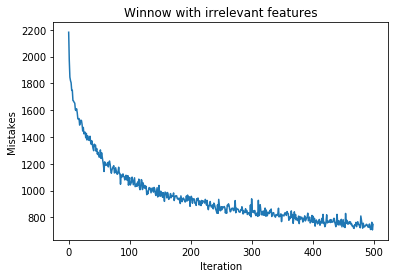

In [25]:
# Training using the winrow algorithm
x = X/np.amax(np.absolute(X))
x = np.hstack((x, -1*x))
n, d = x.shape

w = np.full([d,], 1/(d+1))
b = 1/(d+1)
max_pass = 500
step_size = 1/np.amax(np.absolute(x))
w, b, mistake = winnow_alogrithm(x, y, w, b, step_size, max_pass)
plot_mistake_iterations(mistake, "Winnow with irrelevant features")

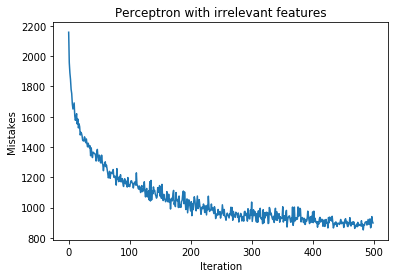

In [27]:
# Training using the perceptron algorithm
n, d = X.shape
x = X
w = np.zeros([d,])
b = 0
max_pass = 500
w, b, mistake = perceptron_algo(x, y, w, b, max_pass)
plot_mistake_iterations(mistake, "Perceptron with irrelevant features")

As expected the winrow algorithm converges in less mistakes at around 700, where the perceptron converges around 900. So it is adavantages to use winrow's algorithm when the feature set is sparse and only some of features are predicting well, and perceptron algorithm is favourable in the oppostie situation.

# Excercise 2

### 1) Implement ridge regression

Define our own regression class that conforms to sklearn estimator so we can automatically iterate over all possible lambdas

In [1]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

# Inherit scoring method from RegressorMixin (uses mean-square-error)
class RidgeRegression(BaseEstimator, RegressorMixin):
    def __init__(self, lmbda=0):
        super().__init__()
        self.lmbda = lmbda
        
    def fit(self, X, Y):
        ## From the lecture slides: (X.T*X + lmdba*I)*W = X.T*Y
        I_x = np.eye(X.shape[1])
        self.W = np.linalg.solve((X.T.dot(X) + self.lmbda*I_x), X.T.dot(Y))
        return self
    
    def predict(self, X):
        pred = X.dot(self.W)
        return pred

Define a function to run ridge regression for all lambda on given dataset

In [48]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def run_all_ridge(X_train, Y_train, X_test, Y_test, print_non_zero=True, print_non_zero_last_1000=False):
    lmbda_vals = np.arange(0, 101, 10)
    for lmbda in lmbda_vals:
        # get train and validation scores using 10-KFold cross validation
        scores = cross_validate(RidgeRegression(lmbda=lmbda), X_train, Y_train, cv=KFold(10), return_train_score=True)
        mean_train_error = scores['train_score'].mean()
        mean_validation_error = scores['test_score'].mean()
        ridge_estimator = RidgeRegression(lmbda)
        ridge_estimator.fit(X_train, Y_train)
        y_pred = ridge_estimator.predict(X_test)
        mean_sq_err_test = mean_squared_error(Y_test, y_pred) 
        w = ridge_estimator.W
        non_z = np.count_nonzero(w != 0)
        pct_non_z = non_z/len(w)*100
        if print_non_zero_last_1000:
            w = w[-1000:]
            non_z = np.count_nonzero(w != 0)
            pct_non_z = non_z/len(w)*100
            
        
        print('lambda = {}'.format(lmbda))
        print('mean training error = {}'.format(mean_train_error))
        print('mean validation error = {}'.format(mean_validation_error))
        print('test error = {}'.format(mean_sq_err_test))
        if print_non_zero:
            print('pct non-zero = {}'.format(pct_non_z))
        print('')
        
        

Run on regular train and test data

In [49]:
X_test = np.genfromtxt('housing_X_test.csv', delimiter=',')
X_train = np.genfromtxt('housing_X_train.csv', delimiter=',')
Y_test = np.genfromtxt('housing_Y_test.csv', delimiter=',')
Y_train = np.genfromtxt('housing_Y_train.csv', delimiter=',')
run_all_ridge(X_train, Y_train, X_test, Y_test)

lambda = 0
mean training error = 0.8737346905436739
mean validation error = 0.5621755330136937
test error = 424.186499372599
pct non-zero = 100.0

lambda = 10
mean training error = 0.865028566684277
mean validation error = 0.593171580615621
test error = 96.37960987437306
pct non-zero = 100.0

lambda = 20
mean training error = 0.8594405739068529
mean validation error = 0.5942596513962037
test error = 111.73240756156797
pct non-zero = 100.0

lambda = 30
mean training error = 0.8525080040567904
mean validation error = 0.586178692039194
test error = 127.67720669642176
pct non-zero = 100.0

lambda = 40
mean training error = 0.8447127513332265
mean validation error = 0.5718718996482549
test error = 140.70733088503977
pct non-zero = 100.0

lambda = 50
mean training error = 0.8364479767397777
mean validation error = 0.5535103025709982
test error = 150.58533963565978
pct non-zero = 100.0

lambda = 60
mean training error = 0.8279800646602077
mean validation error = 0.532591377994884
test error =

### 2) Scale a random x and y

In [50]:
X_test = np.genfromtxt('housing_X_test.csv', delimiter=',')
X_train = np.genfromtxt('housing_X_train.csv', delimiter=',')
Y_test = np.genfromtxt('housing_Y_test.csv', delimiter=',')
Y_train = np.genfromtxt('housing_Y_train.csv', delimiter=',')

X_train[45,:] = X_train[45,:]*10**6

run_all_ridge(X_train, Y_train, X_test, Y_test, print_non_zero=False)

lambda = 0
mean training error = 0.019738178230914494
mean validation error = -42861406962.97849
test error = 1036.6785872845912

lambda = 10
mean training error = -0.0649451012969752
mean validation error = -45163949172.70506
test error = 2088.5606925060724

lambda = 20
mean training error = -0.08503944546518527
mean validation error = -45435416637.5909
test error = 1630.2928277322585

lambda = 30
mean training error = -0.10354544438309295
mean validation error = -45599504514.23328
test error = 1319.811318352098

lambda = 40
mean training error = -0.12159528110397641
mean validation error = -45718066658.657616
test error = 1135.3891619599056

lambda = 50
mean training error = -0.13907128554372955
mean validation error = -45812068965.34746
test error = 1030.34928565113

lambda = 60
mean training error = -0.15585024251987387
mean validation error = -45891655981.98366
test error = 973.715919980338

lambda = 70
mean training error = -0.17188358489705263
mean validation error = -4596241736

### 3) Run with irrelevant columns

In [51]:
X_test = np.genfromtxt('housing_X_test.csv', delimiter=',')
X_train = np.genfromtxt('housing_X_train.csv', delimiter=',')
Y_test = np.genfromtxt('housing_Y_test.csv', delimiter=',')
Y_train = np.genfromtxt('housing_Y_train.csv', delimiter=',')

irrel = np.random.standard_normal((X_train.shape[0], 1000))
X_train = np.hstack((X_train, irrel))

irrel = np.random.standard_normal((X_test.shape[0], 1000))
X_test = np.hstack((X_test, irrel))

run_all_ridge(X_train, Y_train, X_test, Y_test, print_non_zero_last_1000=True)

lambda = 0
mean training error = 1.0
mean validation error = -11826577.022134762
test error = 12270516.9960788
pct non-zero = 100.0

lambda = 10
mean training error = 0.9999116057818555
mean validation error = -0.5983153806365298
test error = 109.60115135499427
pct non-zero = 100.0

lambda = 20
mean training error = 0.9996596856631929
mean validation error = -0.5893362248564546
test error = 109.01724549708823
pct non-zero = 100.0

lambda = 30
mean training error = 0.9992621389428795
mean validation error = -0.5809814820995305
test error = 108.4724407560631
pct non-zero = 100.0

lambda = 40
mean training error = 0.9987345524928063
mean validation error = -0.5731929018908933
test error = 107.96289613754456
pct non-zero = 100.0

lambda = 50
mean training error = 0.998090565032497
mean validation error = -0.565919211109415
test error = 107.48527418618806
pct non-zero = 100.0

lambda = 60
mean training error = 0.9973421637828151
mean validation error = -0.5591150963482554
test error = 107.0